# Final Project

## Predict whether a mammogram mass is benign or malignant

## VALIDATE DATA

In [1]:
import pandas as pd

masses_data_original = pd.read_csv('mammographic_masses.data.txt', na_values=['?'],
                         names = ['BI-RADS', 'age', 'shape', 'margin', 'density', 'severity'])
masses_data_original.head()

BI-RADS   age  shape  margin  density  severity
0      5.0  67.0    3.0     5.0      3.0         1
1      4.0  43.0    1.0     1.0      NaN         1
2      5.0  58.0    4.0     5.0      3.0         1
3      4.0  28.0    1.0     1.0      3.0         0
4      5.0  74.0    1.0     5.0      NaN         1

In [2]:
masses_data_original.info

<bound method DataFrame.info of      BI-RADS   age  shape  margin  density  severity
0        5.0  67.0    3.0     5.0      3.0         1
1        4.0  43.0    1.0     1.0      NaN         1
2        5.0  58.0    4.0     5.0      3.0         1
3        4.0  28.0    1.0     1.0      3.0         0
4        5.0  74.0    1.0     5.0      NaN         1
..       ...   ...    ...     ...      ...       ...
956      4.0  47.0    2.0     1.0      3.0         0
957      4.0  56.0    4.0     5.0      3.0         1
958      4.0  64.0    4.0     5.0      3.0         0
959      5.0  66.0    4.0     5.0      3.0         1
960      4.0  62.0    3.0     3.0      3.0         0

[961 rows x 6 columns]>

### Identify invalid data
In order to make the data to be identified and analyzed by the models, the invalid data(data containing null values) should be indetified and coverted to the valid value to suit the models.

In [3]:
masses_data_original.loc[(masses_data_original['age'].isnull()) |
              (masses_data_original['shape'].isnull()) |
              (masses_data_original['margin'].isnull()) |
              (masses_data_original['density'].isnull())]

BI-RADS   age  shape  margin  density  severity
1        4.0  43.0    1.0     1.0      NaN         1
4        5.0  74.0    1.0     5.0      NaN         1
5        4.0  65.0    1.0     NaN      3.0         0
6        4.0  70.0    NaN     NaN      3.0         0
7        5.0  42.0    1.0     NaN      3.0         0
..       ...   ...    ...     ...      ...       ...
778      4.0  60.0    NaN     4.0      3.0         0
819      4.0  35.0    3.0     NaN      2.0         0
824      6.0  40.0    NaN     3.0      4.0         1
884      5.0   NaN    4.0     4.0      3.0         1
923      5.0   NaN    4.0     3.0      3.0         1

[130 rows x 6 columns]

### Covert invalid data with mean values
There are 4 columns have null value which are columns of AGE, SHAPE, MARGIN, and DENSITY. Based on the limited data we have, we could first convert those null values to categorical mean values.

In [4]:
mean_total_age = masses_data_original['age'].mean()
mean_total_shape = masses_data_original['shape'].mean()
mean_total_margin = masses_data_original['margin'].mean()
mean_total_density = masses_data_original['density'].mean()
masses_data_mean = masses_data_original.copy()
masses_data_mean['age'].fillna(mean_total_age, inplace=True)
masses_data_mean['shape'].fillna(mean_total_shape, inplace=True)
masses_data_mean['margin'].fillna(mean_total_margin, inplace=True)
masses_data_mean['density'].fillna(mean_total_density, inplace=True)
masses_data_mean.info

<bound method DataFrame.info of      BI-RADS   age  shape  margin   density  severity
0        5.0  67.0    3.0     5.0  3.000000         1
1        4.0  43.0    1.0     1.0  2.910734         1
2        5.0  58.0    4.0     5.0  3.000000         1
3        4.0  28.0    1.0     1.0  3.000000         0
4        5.0  74.0    1.0     5.0  2.910734         1
..       ...   ...    ...     ...       ...       ...
956      4.0  47.0    2.0     1.0  3.000000         0
957      4.0  56.0    4.0     5.0  3.000000         1
958      4.0  64.0    4.0     5.0  3.000000         0
959      5.0  66.0    4.0     5.0  3.000000         1
960      4.0  62.0    3.0     3.0  3.000000         0

[961 rows x 6 columns]>

### Convert invalid data by dropping them
Another way to deal with the null values is to drop the records containing null values.

In [5]:
masses_data_drop = pd.DataFrame(masses_data_original.dropna(), columns = ['BI-RADS', 'age', 'shape', 'margin', 'density', 'severity'])
masses_data_drop.info

<bound method DataFrame.info of      BI-RADS   age  shape  margin  density  severity
0        5.0  67.0    3.0     5.0      3.0         1
2        5.0  58.0    4.0     5.0      3.0         1
3        4.0  28.0    1.0     1.0      3.0         0
8        5.0  57.0    1.0     5.0      3.0         1
10       5.0  76.0    1.0     4.0      3.0         1
..       ...   ...    ...     ...      ...       ...
956      4.0  47.0    2.0     1.0      3.0         0
957      4.0  56.0    4.0     5.0      3.0         1
958      4.0  64.0    4.0     5.0      3.0         0
959      5.0  66.0    4.0     5.0      3.0         1
960      4.0  62.0    3.0     3.0      3.0         0

[830 rows x 6 columns]>

### Validate the data having no null values

In [6]:
masses_data_drop.loc[(masses_data_drop['age'].isnull()) |
              (masses_data_drop['shape'].isnull()) |
              (masses_data_drop['margin'].isnull()) |
              (masses_data_drop['density'].isnull())]

Empty DataFrame
Columns: [BI-RADS, age, shape, margin, density, severity]
Index: []

# DATA CHECKING

Before implementing the data into machine learning models, we would better check the data to make sure it is clean using "describe" function.

In [7]:
masses_data_mean.describe()

BI-RADS         age       shape      margin     density    severity
count  959.000000  961.000000  961.000000  961.000000  961.000000  961.000000
mean     4.348279   55.487448    2.721505    2.796276    2.910734    0.463059
std      1.783031   14.442373    1.222561    1.526880    0.365074    0.498893
min      0.000000   18.000000    1.000000    1.000000    1.000000    0.000000
25%      4.000000   45.000000    2.000000    1.000000    3.000000    0.000000
50%      4.000000   57.000000    3.000000    3.000000    3.000000    0.000000
75%      5.000000   66.000000    4.000000    4.000000    3.000000    1.000000
max     55.000000   96.000000    4.000000    5.000000    4.000000    1.000000

In [8]:
masses_data_drop.describe()

BI-RADS         age       shape      margin     density    severity
count  830.000000  830.000000  830.000000  830.000000  830.000000  830.000000
mean     4.393976   55.781928    2.781928    2.813253    2.915663    0.485542
std      1.888371   14.671782    1.242361    1.567175    0.350936    0.500092
min      0.000000   18.000000    1.000000    1.000000    1.000000    0.000000
25%      4.000000   46.000000    2.000000    1.000000    3.000000    0.000000
50%      4.000000   57.000000    3.000000    3.000000    3.000000    0.000000
75%      5.000000   66.000000    4.000000    4.000000    3.000000    1.000000
max     55.000000   96.000000    4.000000    5.000000    4.000000    1.000000

### Data value scale check
From the 2 output tables, we found the features have some different scales. This could affect the correlation between each of features, as well as the accuracy of the prediction. Therefore, to make each feature is EQUALLY important, we need to normalize feature values before use them to train the model. The normalization will execute on the input data only after the data split.

## NORMALIZATION
In order to avoid certain features with a huge scale outweighing other features with tiny scales, and in convenience implement the data into scikit_learn models as well, we convert the Pandas Dataframes structure into NumPy arrays is a necessary step. Moreover, the training activity needs input data and output data. Consequently, create 2 arrays which are age, shape, margin and density features as input array (ignore the BI-RADS code because it's irrelevant to the prediction), severity feature as output array.

In [9]:
all_features_mean = masses_data_mean[['age', 'shape',
                             'margin', 'density']].values
all_classes_mean = masses_data_mean['severity'].values

all_features_drop = masses_data_drop[['age', 'shape',
                             'margin', 'density']].values
all_classes_drop = masses_data_drop['severity'].values

feature_names = ['age', 'shape', 'margin', 'density']

# all_classes

In [10]:
all_features_mean

array([[67.        ,  3.        ,  5.        ,  3.        ],
       [43.        ,  1.        ,  1.        ,  2.91073446],
       [58.        ,  4.        ,  5.        ,  3.        ],
       ...,
       [64.        ,  4.        ,  5.        ,  3.        ],
       [66.        ,  4.        ,  5.        ,  3.        ],
       [62.        ,  3.        ,  3.        ,  3.        ]])

In [11]:
all_features_drop

array([[67.,  3.,  5.,  3.],
       [58.,  4.,  5.,  3.],
       [28.,  1.,  1.,  3.],
       ...,
       [64.,  4.,  5.,  3.],
       [66.,  4.,  5.,  3.],
       [62.,  3.,  3.,  3.]])

### Feature values normalization
Some of our models used later on require the input data to be normalized, so go ahead and normalize the attribute data using preprocessing.StandardScaler().

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
all_features_mean_scaled = scaler.fit_transform(all_features_mean)
all_features_mean_scaled

array([[ 0.79755224,  0.22791465,  1.44403739,  0.24464071],
       [-0.86508983, -1.40884695, -1.17704837,  0.        ],
       [ 0.17406146,  1.04629545,  1.44403739,  0.24464071],
       ...,
       [ 0.58972198,  1.04629545,  1.44403739,  0.24464071],
       [ 0.72827549,  1.04629545,  1.44403739,  0.24464071],
       [ 0.45116848,  0.22791465,  0.13349451,  0.24464071]])

In [13]:
scaler = StandardScaler()
all_features_drop_scaled = scaler.fit_transform(all_features_drop)
all_features_drop_scaled

array([[ 0.7650629 ,  0.17563638,  1.39618483,  0.24046607],
       [ 0.15127063,  0.98104077,  1.39618483,  0.24046607],
       [-1.89470363, -1.43517241, -1.157718  ,  0.24046607],
       ...,
       [ 0.56046548,  0.98104077,  1.39618483,  0.24046607],
       [ 0.69686376,  0.98104077,  1.39618483,  0.24046607],
       [ 0.42406719,  0.17563638,  0.11923341,  0.24046607]])

## SPLIT THE DATA
To validate the algorithm that we selected finally, we have to separate the data as train and test.
Before moving to K-Fold cross validation and random forests, start by creating a single train/test split of our data. Set aside 70% for training, and 30% for testing.

In [15]:
from sklearn import model_selection

# Create training and testing datasets
X_m = all_features_mean_scaled
y_m = all_classes_mean
X_d = all_features_drop_scaled
y_d = all_classes_drop
X_m_train, X_m_test, y_m_train, y_m_test = model_selection.train_test_split(X_m, y_m, test_size=0.25, random_state=1) 
X_d_train, X_d_test, y_d_train, y_d_test = model_selection.train_test_split(X_d, y_d, test_size=0.25, random_state=1) 

In [16]:
len(X_m_train)

720

In [17]:
len(X_d_train)

622

In [15]:
len(y_m_test)

241

In [16]:
len(y_d_test)

208

## Decision Trees

In [17]:
import numpy
from sklearn.model_selection import train_test_split

# fix the random numbers
numpy.random.seed(1234)

#(training_inputs,
# testing_inputs,
# training_classes,
# testing_classes) = train_test_split(all_features_scaled, all_classes, train_size=0.75, random_state=1)

### Model Creation
Now create a DecisionTreeClassifier and fit it to your training data.

In [18]:
from sklearn.tree import DecisionTreeClassifier

dtc_m = DecisionTreeClassifier(random_state=1)
dtc_d = DecisionTreeClassifier(random_state=1)

# Train the classifier on the training set
history_m = dtc_m.fit(X_m_train, y_m_train)
history_d = dtc_d.fit(X_d_train, y_d_train)

# then predict the values of the features test set

y_m_pred = dtc_m.predict(X_m_test)
y_d_pred = dtc_d.predict(X_d_test)

In [19]:
print(y_m_pred)

[0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0
 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0
 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0
 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1
 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 0
 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 0
 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1]


In [20]:
print(y_d_pred)

[0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0
 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1
 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0
 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0
 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0]


### Model Score
caculate the score using mean value data

In [21]:
dtc_m.score(X_m_test, y_m_test)

0.7344398340248963

In [22]:
dtc_d.score(X_d_test, y_d_test)

0.7355769230769231

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, y_m_test, y_m_pred, y_d_test, y_d_pred):
    
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    cf_matrix = confusion_matrix(y_m_test, y_m_pred)
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
    ax.set_title('%s 241 values with mean of the dataset\n' %model);
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    ## Display the visualization of the Confusion Matrix.

    plt.subplot(1,2,2)
    cf_matrix = confusion_matrix(y_d_test, y_d_pred)
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
    ax.set_title('%s 208 values with mean of the dataset\n' %model);
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    ## Display the visualization of the Confusion Matrix.

    plt.show()
    
plot_confusion_matrix("Decision tree", y_m_test, y_m_pred, y_d_test, y_d_pred)

 caculate the score using mean value data

In [24]:
from sklearn import metrics
import matplotlib.pyplot as plt

# REFERENCE: https://www.zhihu.com/question/39840928

# ROC curve
# we use Receiver Operating Characteristic (ROC) metric to evaluate classifier output quality using cross-validation
# true positive rate = TP/(TP+FN): it's the train class 1 with predicion probability as 1
# false positive rate = FP/(FP+TN)： it's the train class 0 with predicion probability as 1

# AUC is the area under the ROC curve. ROC curve's x-axis is FPRate, y-axis IS TPRate.
# When FPRate equal TPRate as x=y, AUC is 1*1*0.5=0.5

def createROC(y_m_test, y_m_pred, y_d_test, y_d_pred):
    plt.figure(figsize=(20,5))    
    
    plt.subplot(1,2,1)
    
    fpr, tpr, thresholds = metrics.roc_curve(y_m_test, y_m_pred)
    roc_auc = metrics.auc(fpr, tpr)
    
    plt.title('ROC: Meaned dataset')
    
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f%%'% (roc_auc*100))
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    # plot the drop one
    
    plt.subplot(1,2,2)
    
    fpr, tpr, thresholds = metrics.roc_curve(y_d_test, y_d_pred)
    roc_auc = metrics.auc(fpr, tpr)
    
    plt.title('ROC: Dropped dataset')
    
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f%%'% (roc_auc*100))
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    plt.show()

createROC(y_m_test, y_m_pred, y_d_test, y_d_pred)

### STORE THE DECISION TREE MODEL FOR COMPARISON

In [25]:
from sklearn.metrics import accuracy_score
## We group the results to a new dictionary and so on for each classifier to compare them at the end

# We initialize the list of dictionaries (each dictionary will contain a model label with the predicted results & accuracy)
models=[] 

In [26]:
def store_data(model_name, y_d_pred, y_d_test, y_m_test, y_m_pred):
    model = {}
    model['label'] = '{} with droped dataset'.format(model_name)
    model['pred'] = y_d_pred
    model['test'] = y_d_test
    model['acc'] = accuracy_score(y_d_test, y_d_pred)

    models.append(model)

    model = {}
    model['label'] = '{} with meaned dataset'.format(model_name)
    model['pred'] = y_m_pred
    model['test'] = y_m_test
    model['acc'] = accuracy_score(y_m_test, y_m_pred)

    models.append(model)

## Adding the results to a new dictionary to compare at the end
store_data("Decision tree", y_d_pred, y_d_test, y_m_test, y_m_pred)
# print(models)

### Tree Plot
Display the resulting decision tree.

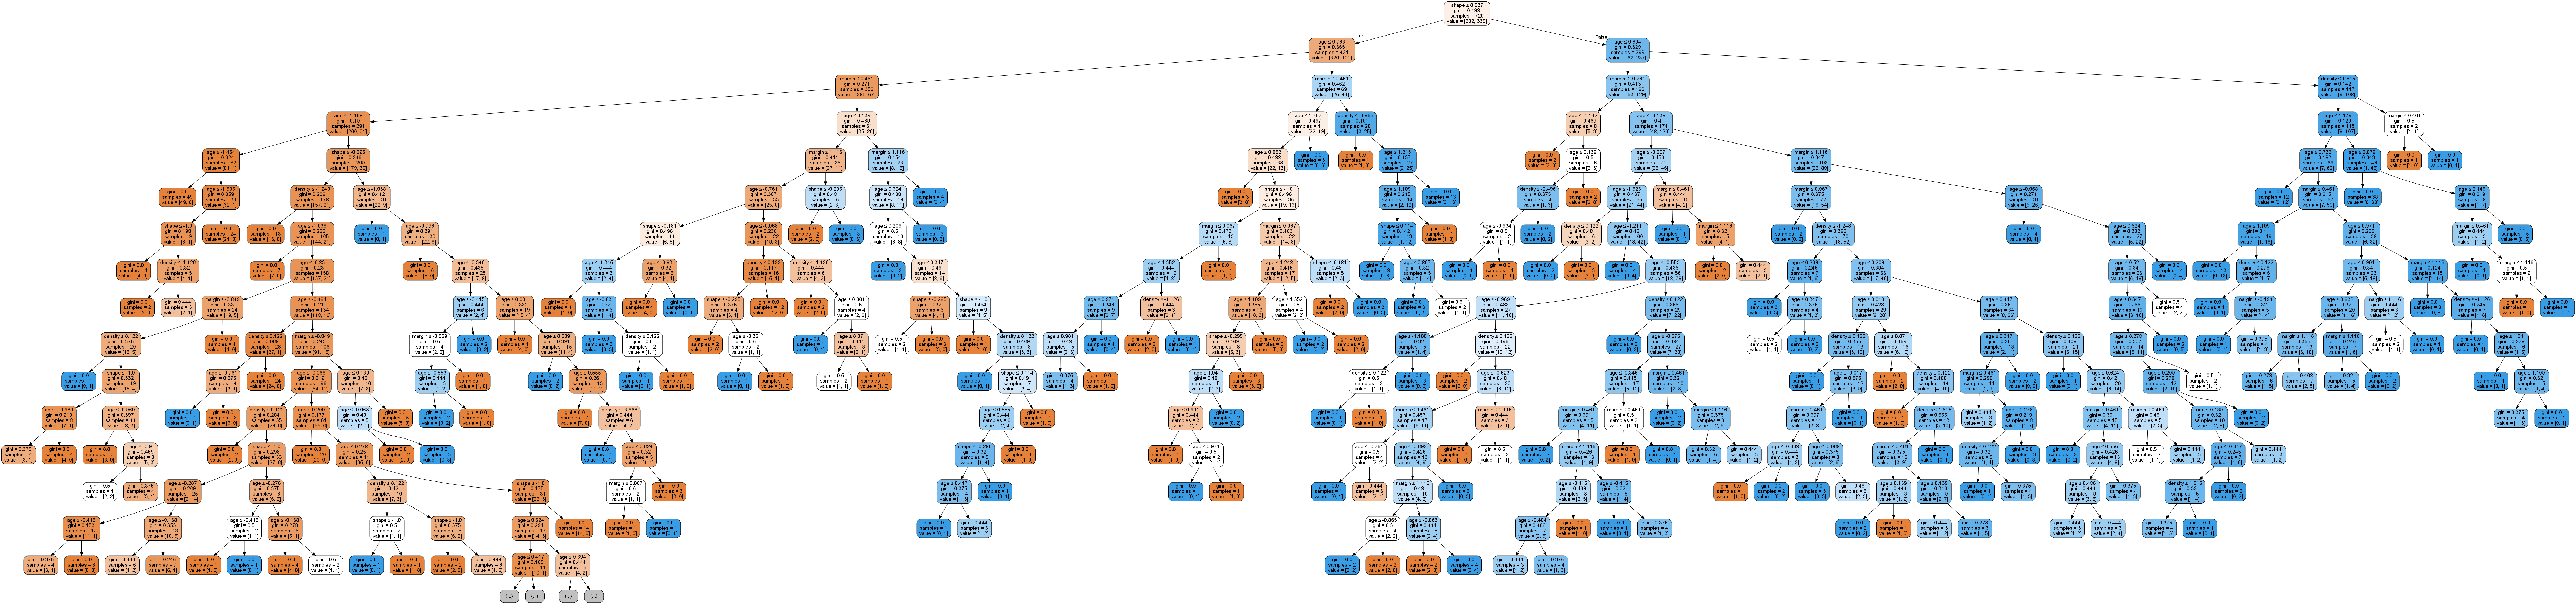

In [27]:
from IPython.display import Image  
from six import StringIO  
from sklearn import tree
from pydotplus import graph_from_dot_data 

dot_data = StringIO()

# Get the dot graph of our decision tree
tree.export_graphviz(history_m, out_file=dot_data, 
                     feature_names=feature_names,
                     filled=True, rounded=True,
                     special_characters=True, max_depth=15)

# Convert this dot graph into an image
graph = graph_from_dot_data(dot_data.getvalue())
# make sure you have graphviz installed and set in Path of your system
Image(graph.create_png())

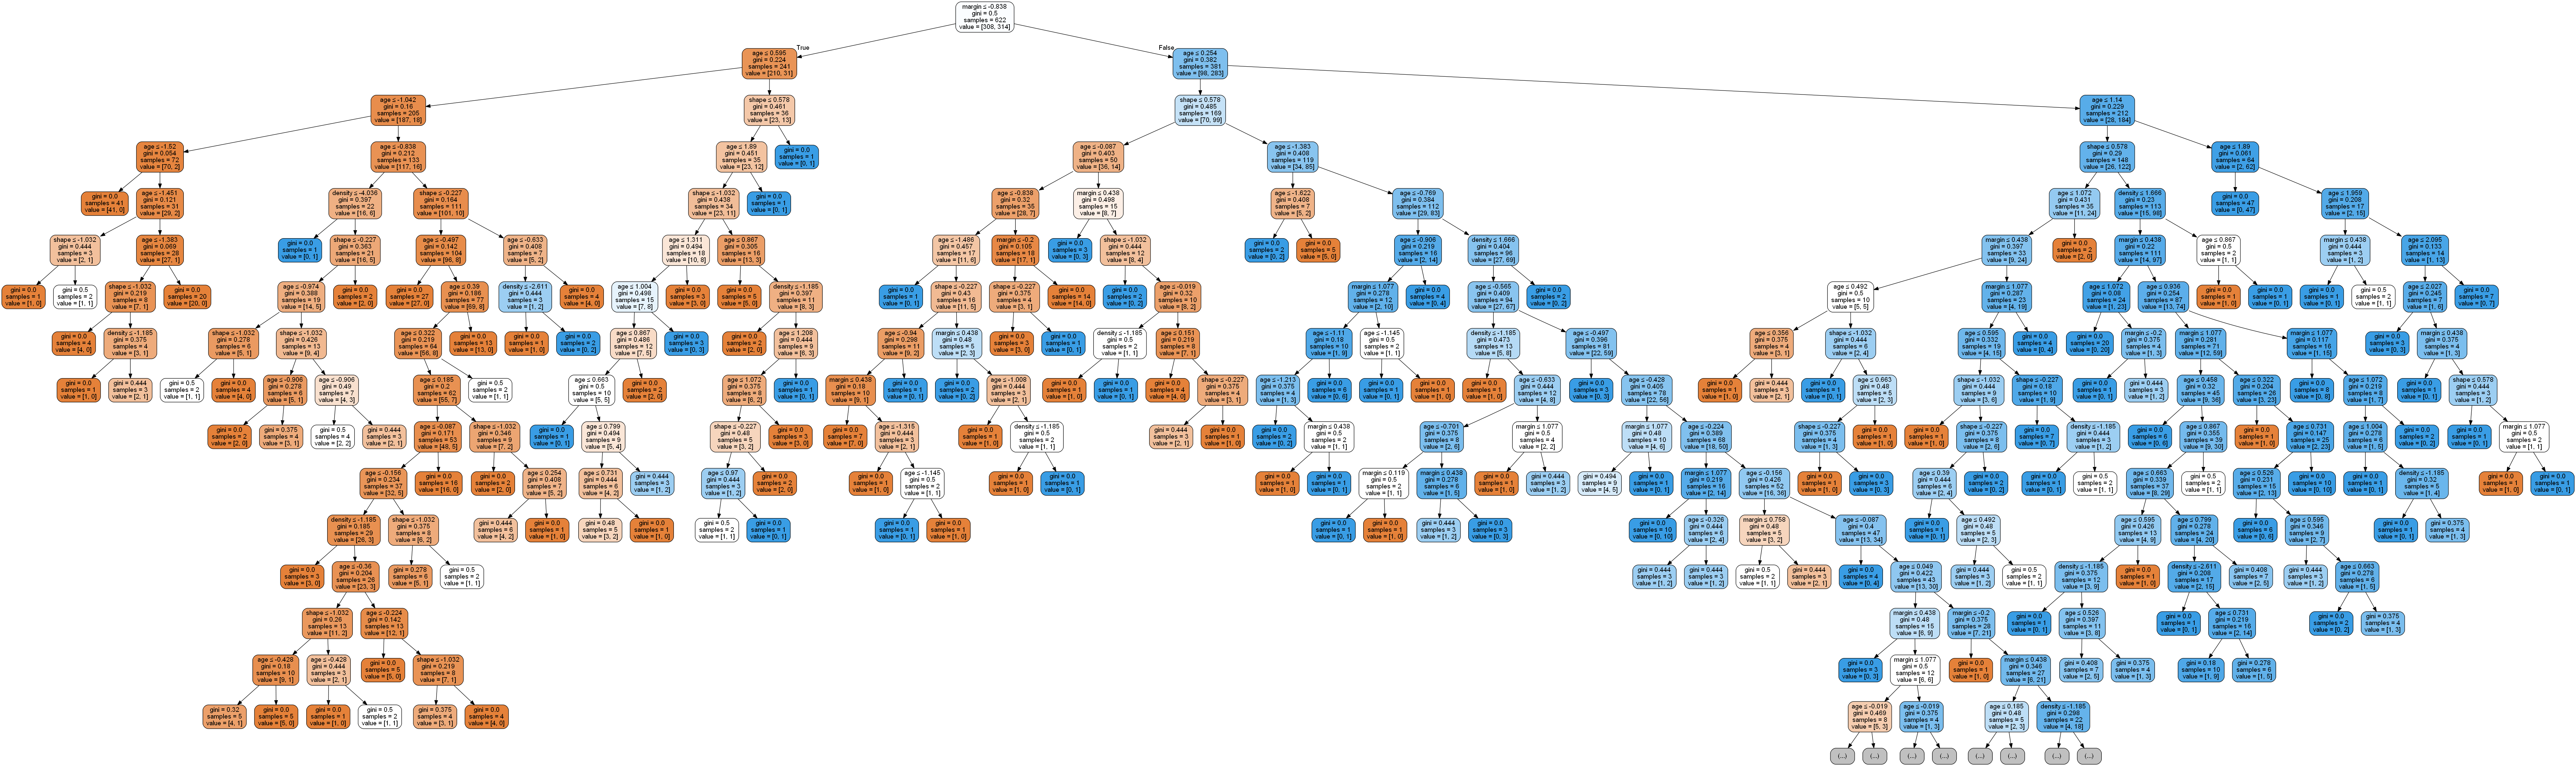

In [28]:
# Get the dot graph of our decision tree
tree.export_graphviz(history_d, out_file=dot_data, 
                     feature_names=feature_names,
                     filled=True, rounded=True,
                     special_characters=True, max_depth=15)

# Convert this dot graph into an image
graph = graph_from_dot_data(dot_data.getvalue())
# make sure you have graphviz installed and set in Path of your system
Image(graph[1].create_png())

### K-Fold Cross Validation:

One of cross-validation strategies is to call the cross_val_score helper function on the estimator and the dataset
In this model, we will estimate the accuracy Decision Tree by spliting the data, fitting the model and 
compiling cv=10 consecutive times (with different splits each time)
k-Fold cross-validation divide all the samples in k groups 'folds'. The prediction function is learned using (k-1) folds
and the remaining fold is used for testing

In [29]:
def cv_score(model_m, X_m, y_m, model_d, X_d, y_d, times):
    cv_scores = model_selection.cross_val_score(model_m, X_m, y_m, cv=times)
    print(cv_scores)
    print("Accuracy with meaned dataset: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

    # cross_val_score() function evaluates score using validation method to avoid any kind of overfitting
    cv_scores = model_selection.cross_val_score(model_d, X_d, y_d, cv=times)
    print(cv_scores)
    # The mean score and the 95% confidence interval of the score estimate
    print("Accuracy with droped dataset: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))


dtc_m = tree.DecisionTreeClassifier(random_state=0)
dtc_d = tree.DecisionTreeClassifier(random_state=0)
cv_score(dtc_m, X_m, y_m, dtc_d, X_d, y_d, 10)

[0.72164948 0.75       0.73958333 0.71875    0.71875    0.79166667
 0.67708333 0.79166667 0.73958333 0.69791667]
Accuracy with meaned dataset: 0.73 (+/- 0.07)
[0.73493976 0.75903614 0.72289157 0.75903614 0.75903614 0.69879518
 0.73493976 0.74698795 0.75903614 0.6746988 ]
Accuracy with droped dataset: 0.73 (+/- 0.05)


## RANDOM FOREST CLASSIFIER

In [30]:
# Build the model of random forest classifier

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10)

# Fit the model
rfc_m = rfc.fit(X_m_train, y_m_train)
rfc_d = rfc.fit(X_d_train, y_d_train)

# Predict the results
y_m_pred = rfc_m.predict(X_m_test)
y_d_pred = rfc_d.predict(X_d_test)

cv_score(rfc_m, X_m, y_m, rfc_d, X_d, y_d, 10)

[0.74226804 0.78125    0.79166667 0.76041667 0.79166667 0.77083333
 0.6875     0.79166667 0.70833333 0.72916667]
Accuracy with meaned dataset: 0.76 (+/- 0.07)
[0.69879518 0.78313253 0.80722892 0.75903614 0.81927711 0.72289157
 0.78313253 0.77108434 0.74698795 0.71084337]
Accuracy with droped dataset: 0.76 (+/- 0.08)


In [31]:
createROC(y_m_test, y_m_pred, y_d_test, y_d_pred)

In [32]:
plot_confusion_matrix("Random forest classifier", y_m_test, y_m_pred, y_d_test, y_d_pred)

#### STORE THE RANDOM FOREST MODEL FOR COMPARISON

In [33]:
## Adding the results to a new dictionary to compare at the end
store_data("Random forest classifier", y_d_pred, y_d_test, y_m_test, y_m_pred)
# print(models)

## SVM

Next try using svm.SVC with a linear kernel, poly kernel, RBF kernel, and sigmoid kernel to compare the accuracy by AUC

### 1. LINEAR KERNEL

In [34]:
from sklearn import svm

# Build the model svm
svc = svm.SVC(kernel='linear', C=1, gamma='scale')

# Fit the model
svc_m = svc.fit(X_m_train, y_m_train)
svc_d = svc.fit(X_d_train, y_d_train)

# Predict the results 
y_m_pred = svc.predict(X_m_test)
y_d_pred = svc.predict(X_d_test)

cv_score(svc_m, X_m, y_m, svc_d, X_d, y_d, 10)

[0.75257732 0.77083333 0.79166667 0.84375    0.78125    0.80208333
 0.77083333 0.79166667 0.82291667 0.79166667]
Accuracy with meaned dataset: 0.79 (+/- 0.05)
[0.71084337 0.79518072 0.84337349 0.80722892 0.84337349 0.72289157
 0.79518072 0.81927711 0.87951807 0.75903614]
Accuracy with droped dataset: 0.80 (+/- 0.10)


In [35]:
plot_confusion_matrix("SVM - Linear Kernel", y_m_test, y_m_pred, y_d_test, y_d_pred)

In [36]:
createROC(y_m_test, y_m_pred, y_d_test, y_d_pred)

#### STORE THE SVM MODEL WITH LINEAR KERNEL FOR COMPARISON

In [37]:
## Adding the results to a new dictionary to compare at the end
store_data("SVM - Linear Kernel", y_d_pred, y_d_test, y_m_test, y_m_pred)
# print(models)

### 2. POLY KERNEL

In [38]:
# Build the model SVM-Poly kernel
svc = svm.SVC(kernel='poly', C=1, gamma='scale')

# Fit the model
svc_m = svc.fit(X_m_train, y_m_train)
svc_d = svc.fit(X_d_train, y_d_train)

# Predict the results 
y_m_pred = svc.predict(X_m_test)
y_d_pred = svc.predict(X_d_test)

In [39]:
cv_score(svc_m, X_m, y_m, svc_d, X_d, y_d, 10)

[0.77319588 0.79166667 0.8125     0.82291667 0.79166667 0.83333333
 0.69791667 0.8125     0.83333333 0.75      ]
Accuracy with meaned dataset: 0.79 (+/- 0.08)
[0.75903614 0.79518072 0.84337349 0.80722892 0.8313253  0.73493976
 0.74698795 0.79518072 0.84337349 0.74698795]
Accuracy with droped dataset: 0.79 (+/- 0.08)


In [40]:
plot_confusion_matrix("SVM - Poly Kernel", y_m_test, y_m_pred, y_d_test, y_d_pred)

In [41]:
createROC(y_m_test, y_m_pred, y_d_test, y_d_pred)

#### STORE THE SVM MODEL WITH POLY KERNEL FOR COMPARISON

In [42]:
## Adding the results to a new dictionary to compare at the end
store_data("SVM - Poly Kernel", y_d_pred, y_d_test, y_m_test, y_m_pred)
# print(models)

### 3. RBF KERNEL

In [43]:
# Build the model SVM-RBF Kernel
svc = svm.SVC(kernel='rbf', C=1, gamma='scale')

# Fit the model
svc_m = svc.fit(X_m_train, y_m_train)
svc_d = svc.fit(X_d_train, y_d_train)

# Predict the results 
y_m_pred = svc.predict(X_m_test)
y_d_pred = svc.predict(X_d_test)

In [44]:
cv_score(svc_m, X_m, y_m, svc_d, X_d, y_d, 10)

[0.82474227 0.77083333 0.8125     0.83333333 0.83333333 0.84375
 0.71875    0.79166667 0.8125     0.78125   ]
Accuracy with meaned dataset: 0.80 (+/- 0.07)
[0.75903614 0.81927711 0.84337349 0.81927711 0.85542169 0.74698795
 0.75903614 0.78313253 0.85542169 0.77108434]
Accuracy with droped dataset: 0.80 (+/- 0.08)


In [45]:
plot_confusion_matrix("SVM - RBF Kernel", y_m_test, y_m_pred, y_d_test, y_d_pred)

In [46]:
createROC(y_m_test, y_m_pred, y_d_test, y_d_pred)

#### STORE THE SVM MODEL WITH RBF KERNEL FOR COMPARISON

In [47]:
## Adding the results to a new dictionary to compare at the end
store_data("SVM - RBF Kernel", y_d_pred, y_d_test, y_m_test, y_m_pred)
# print(models)

### 3. SIGMOID KERNEL

In [48]:
# Build the model svm-sigmoid
svc = svm.SVC(kernel='sigmoid', C=1, gamma='scale')

# Fit the model
svc_m = svc.fit(X_m_train, y_m_train)
svc_d = svc.fit(X_d_train, y_d_train)

# Predict the results 
y_m_pred = svc.predict(X_m_test)
y_d_pred = svc.predict(X_d_test)

In [49]:
cv_score(svc_m, X_m, y_m, svc_d, X_d, y_d, 10)

[0.68041237 0.77083333 0.73958333 0.70833333 0.70833333 0.76041667
 0.73958333 0.75       0.77083333 0.76041667]
Accuracy with meaned dataset: 0.74 (+/- 0.06)
[0.68674699 0.69879518 0.77108434 0.74698795 0.73493976 0.72289157
 0.80722892 0.78313253 0.71084337 0.79518072]
Accuracy with droped dataset: 0.75 (+/- 0.08)


In [50]:
plot_confusion_matrix("SVM - Sigmoid Kernel", y_m_test, y_m_pred, y_d_test, y_d_pred)

In [51]:
createROC(y_m_test, y_m_pred, y_d_test, y_d_pred)

#### STORE THE SVM MODEL WITH SIGMOID KERNEL FOR COMPARISON

In [52]:
## Adding the results to a new dictionary to compare at the end
store_data("SVM - Sigmoid Kernel", y_d_pred, y_d_test, y_m_test, y_m_pred)
# print(models)

## KNN (k nearest neighbors)
Start with a K of 10. K is an example of a hyperparameter - a parameter on the model itself which may need to be tuned for best results on your particular data set. Choosing K is tricky, so we can't discard KNN until we've tried different values of K. Write a for loop to run KNN with K values ranging from 1 to 50 and see if K makes a substantial difference. Make a note of the best performance you could get out of KNN.

In [53]:
from sklearn import neighbors

def search_neighbor(max_neighbors, X_m, y_m, times):
    neigbors_m = []
    for n in range(1, max_neighbors):
        knn = neighbors.KNeighborsClassifier(n_neighbors = n)
        cv_scores_m = model_selection.cross_val_score(knn, X_m, y_m, cv=times)
        print (n, cv_scores_m.mean())
        neigbors_m.append(cv_scores_m.mean())
    return neigbors_m
    
neigbors_m = search_neighbor(50, X_m, y_m, 10)
max(neigbors_m)

1 0.7054982817869416
2 0.6815292096219931
3 0.7533505154639175
4 0.7471219931271478
5 0.7720897766323025
6 0.7866731099656358
7 0.7877147766323024
8 0.7804231099656358
9 0.7887671821305842
10 0.7908290378006873
11 0.7918599656357388
12 0.7845790378006873
13 0.7877147766323024
14 0.7866731099656358
15 0.7887349656357389
16 0.7825171821305842
17 0.7929016323024054
18 0.7845790378006873
19 0.7835588487972509
20 0.7825171821305842
21 0.7897981099656357
22 0.7908505154639175
23 0.7887779209621992
24 0.7887671821305842
25 0.7877362542955326
26 0.7887779209621993
27 0.7939755154639175
28 0.7939862542955327
29 0.7960803264604811
30 0.7950279209621994
31 0.7929553264604811
32 0.7929553264604811
33 0.7919243986254295
34 0.7908934707903781
35 0.7950493986254296
36 0.7950493986254297
37 0.7909149484536083
38 0.7919458762886598
39 0.7971434707903781
40 0.7971542096219931
41 0.7981851374570448
42 0.7960910652920963
43 0.7981743986254297
44 0.7940292096219932
45 0.7929768041237113
46 0.79193513745704

0.7981851374570448

In [54]:
neigbors_d = search_neighbor(50, X_d, y_d, 10)
max(neigbors_d)

1 0.7325301204819278
2 0.6903614457831325
3 0.7542168674698796
4 0.7349397590361446
5 0.7710843373493976
6 0.7686746987951807
7 0.7951807228915662
8 0.7771084337349398
9 0.7903614457831326
10 0.7915662650602409
11 0.7891566265060241
12 0.783132530120482
13 0.7879518072289157
14 0.7867469879518072
15 0.7867469879518072
16 0.7831325301204819
17 0.7783132530120482
18 0.7783132530120482
19 0.7843373493975904
20 0.7855421686746988
21 0.7879518072289156
22 0.7855421686746988
23 0.7783132530120481
24 0.7783132530120482
25 0.7867469879518072
26 0.7855421686746988
27 0.7855421686746988
28 0.7867469879518072
29 0.7855421686746988
30 0.7903614457831325
31 0.7867469879518072
32 0.789156626506024
33 0.7879518072289156
34 0.7867469879518072
35 0.7831325301204819
36 0.7867469879518072
37 0.7843373493975904
38 0.7867469879518072
39 0.7819277108433734
40 0.7843373493975904
41 0.780722891566265
42 0.7819277108433734
43 0.780722891566265
44 0.7819277108433734
45 0.7831325301204819
46 0.7843373493975904
4

0.7951807228915662

From the list of n, we found the optimized n value.

In [55]:
def optimized_n(neigbors_m):
    size = len(neigbors_m)
    for i in range(size):
        if neigbors_m[i] == max(neigbors_m):
            return i
        
optimized_n(neigbors_m)

40

In [56]:
optimized_n(neigbors_d)

6

We use this optimal n value to get the best accuracy

In [57]:
knn = neighbors.KNeighborsClassifier(n_neighbors = optimized_n(neigbors_m))
knn_m = knn.fit(X_m_train, y_m_train)

knn = neighbors.KNeighborsClassifier(n_neighbors = optimized_n(neigbors_d))
knn_d = knn.fit(X_d_train, y_d_train)

# Predict the results 
y_m_pred = knn_m.predict(X_m_test)
y_d_pred = knn_d.predict(X_d_test)

In [58]:
cv_score(knn_m, X_m, y_m, knn_d, X_d, y_d, 10)

[0.73195876 0.80208333 0.8125     0.84375    0.8125     0.82291667
 0.80208333 0.79166667 0.79166667 0.76041667]
Accuracy with meaned dataset: 0.80 (+/- 0.06)
[0.75903614 0.81927711 0.74698795 0.71084337 0.8313253  0.72289157
 0.78313253 0.78313253 0.8313253  0.69879518]
Accuracy with droped dataset: 0.77 (+/- 0.09)


In [59]:
plot_confusion_matrix("KNN", y_m_test, y_m_pred, y_d_test, y_d_pred)

In [60]:
createROC(y_m_test, y_m_pred, y_d_test, y_d_pred)

#### STORE THE KNN MODEL FOR COMPARISON

In [61]:
## Adding the results to a new dictionary to compare at the end
store_data("KNN", y_d_pred, y_d_test, y_m_test, y_m_pred)
# print(models)

### HNSW (Hierarchical Navigable Small World) 

In [62]:
import hnswlib
import numpy as np
# Declaring index
ids_m = np.arange(len(all_features_mean_scaled))
ids_d = np.arange(len(all_features_drop_scaled))
dim = 4
p_m = hnswlib.Index(space = 'l2', dim = dim) # possible options are l2, cosine or ip
p_d = hnswlib.Index(space = 'l2', dim = dim) # possible options are l2, cosine or ip

### Method 1

In [63]:
# Initializing index - the maximum number of elements should be known beforehand
p_m.init_index(max_elements = len(X_m), ef_construction = 200, M = 16)
p_d.init_index(max_elements = len(X_d), ef_construction = 200, M = 16)

In [64]:
# Element insertion (can be called several times):
p_m.add_items(X_m, ids_m)
p_d.add_items(X_d, ids_d)

In [65]:
# Controlling the recall by setting ef:
p_m.set_ef(50) # ef should always be > k
p_d.set_ef(50) # ef should always be > k

In [66]:
# Query dataset, k - number of closest elements (returns 2 numpy arrays)
labels, distances = p_m.knn_query(X_m, k = 1)

In [67]:
print("M Recall/Sensitivity:", np.mean(labels.reshape(-1) == np.arange(len(X_m))), "\n")

M Recall/Sensitivity: 0.5639958376690947 



In [68]:
labels, distances = p_d.knn_query(X_d, k = 1)

In [69]:
print("D Recall/Sensitivity:", np.mean(labels.reshape(-1) == np.arange(len(X_d))), "\n")

D Recall/Sensitivity: 0.5108433734939759 



### Method 2

In [70]:
num_elements = len(all_features_mean_scaled)
labels_index = np.arange(num_elements)
EMBEDDING_SIZE = len(all_features_mean_scaled[0])

In [71]:
# Declaring index
# possible space options are l2, cosine or ip
p = hnswlib.Index(space='l2', dim=EMBEDDING_SIZE)

In [72]:
# Initing index - the maximum number of elements should be known
p.init_index(max_elements=num_elements, ef_construction=50, M=16)

In [73]:
# Element insertion
int_labels = p.add_items(all_features_mean_scaled, labels_index)

In [74]:
# Controlling the recall by setting ef
# ef should always be > k
p.set_ef(4) 

In [75]:
# If you want to save the graph to a file
p.save_index('D:\Google Drive 1\McMaster Degree\Level 4-1\4AI3\Project\mammo_masses_project\HNSW_1.png')

In [76]:
ann_neighbor_indices, ann_distances = p.knn_query(all_features_mean_scaled, k = 1)

In [77]:
print("M Recall/Sensitivity:", np.mean(ann_neighbor_indices.reshape(-1) == np.arange(len(all_features_mean_scaled))), "\n")

M Recall/Sensitivity: 0.5619146722164412 



In [78]:
num_elements = len(all_features_drop_scaled)
labels_index = np.arange(num_elements)
EMBEDDING_SIZE = len(all_features_drop_scaled[0])
p = hnswlib.Index(space='l2', dim=EMBEDDING_SIZE)
p.init_index(max_elements=num_elements, ef_construction=50, M=16)
int_labels = p.add_items(all_features_drop_scaled, labels_index)
p.set_ef(4) 
p.save_index('D:\Google Drive 1\McMaster Degree\Level 4-1\4AI3\Project\mammo_masses_project\HNSW_2.png')

In [79]:
ann_neighbor_indices, ann_distances = p.knn_query(all_features_drop_scaled, k = 1)

In [80]:
print("D Recall/Sensitivity:", np.mean(ann_neighbor_indices.reshape(-1) == np.arange(len(all_features_drop_scaled))), "\n")

D Recall/Sensitivity: 0.5048192771084338 



## Naive Bayes

Now try naive_bayes.MultinomialNB. How does its accuracy stack up?

In [81]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB


#  Scale the input features to normalize the data within a particular range
scaler = MinMaxScaler()
X_m = scaler.fit_transform(X_m)
X_d = scaler.fit_transform(X_d)

# Build the naive bayes model
nb = MultinomialNB()

# Split our data into training and test sets
X_m_train, X_m_test, y_m_train, y_m_test = model_selection.train_test_split(X_m, y_m, test_size=0.25, random_state=0)
X_d_train, X_d_test, y_d_train, y_d_test = model_selection.train_test_split(X_d, y_d, test_size=0.25, random_state=0)

# Fit the model
nb_m = nb.fit(X_m_train, y_m_train)
nb_d = nb.fit(X_d_train, y_d_train)

# Predict the results
y_m_pred = nb.predict(X_m_test)
y_d_pred = nb.predict(X_d_test)

In [82]:
cv_score(nb_m, X_m, y_m, nb_d, X_d, y_d, 10)

[0.74226804 0.6875     0.73958333 0.83333333 0.77083333 0.76041667
 0.71875    0.70833333 0.76041667 0.78125   ]
Accuracy with meaned dataset: 0.75 (+/- 0.08)
[0.73493976 0.78313253 0.79518072 0.8313253  0.8313253  0.78313253
 0.74698795 0.75903614 0.89156627 0.69879518]
Accuracy with droped dataset: 0.79 (+/- 0.11)


In [83]:
plot_confusion_matrix("Naive Bayes", y_m_test, y_m_pred, y_d_test, y_d_pred)

In [84]:
createROC(y_m_test, y_m_pred, y_d_test, y_d_pred)

#### STORE THE NAIVE BAYES MODEL FOR COMPARISON

In [85]:
## Adding the results to a new dictionary to compare at the end
store_data("Naive Bayes", y_d_pred, y_d_test, y_m_test, y_m_pred)
# print(models)

## Logistic Regression

We've tried all these fancy techniques, but fundamentally this is just a binary classification problem. Try Logisitic Regression, which is a simple way to tackling this sort of thing.

In [86]:
from sklearn import linear_model

# Build the logistic regression model
lr = linear_model.LogisticRegression(C=1e5, solver='lbfgs')

# Fit the model
lr_m = lr.fit(X_m_train, y_m_train)
lr_d = lr.fit(X_d_train, y_d_train)

# Predict the results
y_m_pred = lr.predict(X_m_test)
y_d_pred = lr.predict(X_d_test)

In [87]:
cv_score(lr_m, X_m, y_m, lr_d, X_d, y_d, 10)

[0.7628866  0.78125    0.8125     0.85416667 0.79166667 0.8125
 0.75       0.78125    0.83333333 0.80208333]
Accuracy with meaned dataset: 0.80 (+/- 0.06)
[0.75903614 0.78313253 0.85542169 0.81927711 0.8313253  0.73493976
 0.79518072 0.81927711 0.87951807 0.79518072]
Accuracy with droped dataset: 0.81 (+/- 0.08)


In [88]:
plot_confusion_matrix("Logistic Regression", y_m_test, y_m_pred, y_d_test, y_d_pred)

In [89]:
createROC(y_m_test, y_m_pred, y_d_test, y_d_pred)

#### STORE THE LOGISTIC REGRESSION MODEL FOR COMPARISON

In [90]:
## Adding the results to a new dictionary to compare at the end
store_data("Logistic Regression", y_d_pred, y_d_test, y_m_test, y_m_pred)
# print(models)

## Neural Network

As a bonus challenge, let's see if an artificial neural network can do even better. You can use Keras to set up a neural network with 1 binary output neuron and see how it performs. Don't be afraid to run a large number of epochs to train the model if necessary.

In [91]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential

### Model Creation

In [92]:
model = Sequential([
    Dense(6, input_dim=4, kernel_initializer='normal', activation='relu'),        
    Dense(4, kernel_initializer='normal', activation='relu'),

    # Output layer with a binary classification (benign or malignant)
    Dense(1, kernel_initializer='normal', activation='sigmoid'),
])

In [93]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 30        
                                                                 
 dense_1 (Dense)             (None, 4)                 28        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 63
Trainable params: 63
Non-trainable params: 0
_________________________________________________________________


In [94]:
from tensorflow import keras
# tune learning rate： optimizer=keras.optimizers.SGD(learning_rate=___)
# SGD optimizer can be replaced with RMSprop, Adam, and so on.

# Because default learning rate is 0.01, to increase accuracy we drop down lr to 0.001
optimizer=keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

In [95]:
# specify a few more parameters before the training starts
# loss function: compute the quantity that model should seek to minimize during training
# optimizer: stochastic gradient descent
# metrics: monitor the training and testing steps; aka accuracy to present fraction of the image
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [96]:
# import scikeras
# from scikeras.wrappers import KerasClassifier
# from sklearn.model_selection import cross_val_score
# #from sklearn.datasets import make_classification
# # Wrap Keras model so it can be used by scikit-learn
# neural_network = KerasClassifier(build_fn=model, 
#                                  epochs=10, 
#                                  batch_size=100, 
#                                  verbose=0)


In [97]:
# # Evaluate neural network using three-fold cross-validation
# cross_val_score(neural_network, X_m, y_m, cv=3)

In [98]:
# train the model
# epochs parameter can be adjusted.
history_m = model.fit(X_m_train, y_m_train, batch_size=10, epochs=50, verbose=2)

Epoch 1/50
72/72 - 1s - loss: 0.6929 - accuracy: 0.5264 - 1s/epoch - 17ms/step
Epoch 2/50
72/72 - 0s - loss: 0.6909 - accuracy: 0.5681 - 255ms/epoch - 4ms/step
Epoch 3/50
72/72 - 0s - loss: 0.6852 - accuracy: 0.7764 - 254ms/epoch - 4ms/step
Epoch 4/50
72/72 - 0s - loss: 0.6754 - accuracy: 0.7625 - 255ms/epoch - 4ms/step
Epoch 5/50
72/72 - 0s - loss: 0.6618 - accuracy: 0.7528 - 260ms/epoch - 4ms/step
Epoch 6/50
72/72 - 0s - loss: 0.6469 - accuracy: 0.7472 - 264ms/epoch - 4ms/step
Epoch 7/50
72/72 - 0s - loss: 0.6314 - accuracy: 0.7528 - 281ms/epoch - 4ms/step
Epoch 8/50
72/72 - 0s - loss: 0.6171 - accuracy: 0.7653 - 296ms/epoch - 4ms/step
Epoch 9/50
72/72 - 0s - loss: 0.6064 - accuracy: 0.7625 - 265ms/epoch - 4ms/step
Epoch 10/50
72/72 - 0s - loss: 0.5979 - accuracy: 0.7653 - 261ms/epoch - 4ms/step
Epoch 11/50
72/72 - 0s - loss: 0.5894 - accuracy: 0.7694 - 252ms/epoch - 3ms/step
Epoch 12/50
72/72 - 0s - loss: 0.5819 - accuracy: 0.7778 - 236ms/epoch - 3ms/step
Epoch 13/50
72/72 - 0s - lo

In [99]:
history_d = model.fit(X_d_train, y_d_train, batch_size=10, epochs=50, verbose=2)

Epoch 1/50
63/63 - 1s - loss: 0.4666 - accuracy: 0.8023 - 566ms/epoch - 9ms/step
Epoch 2/50
63/63 - 0s - loss: 0.4645 - accuracy: 0.8039 - 298ms/epoch - 5ms/step
Epoch 3/50
63/63 - 0s - loss: 0.4644 - accuracy: 0.8055 - 294ms/epoch - 5ms/step
Epoch 4/50
63/63 - 0s - loss: 0.4634 - accuracy: 0.8055 - 283ms/epoch - 4ms/step
Epoch 5/50
63/63 - 0s - loss: 0.4627 - accuracy: 0.8039 - 293ms/epoch - 5ms/step
Epoch 6/50
63/63 - 0s - loss: 0.4619 - accuracy: 0.8055 - 284ms/epoch - 5ms/step
Epoch 7/50
63/63 - 0s - loss: 0.4612 - accuracy: 0.8071 - 295ms/epoch - 5ms/step
Epoch 8/50
63/63 - 0s - loss: 0.4608 - accuracy: 0.8087 - 288ms/epoch - 5ms/step
Epoch 9/50
63/63 - 0s - loss: 0.4603 - accuracy: 0.8087 - 294ms/epoch - 5ms/step
Epoch 10/50
63/63 - 0s - loss: 0.4595 - accuracy: 0.8039 - 276ms/epoch - 4ms/step
Epoch 11/50
63/63 - 0s - loss: 0.4594 - accuracy: 0.8103 - 283ms/epoch - 4ms/step
Epoch 12/50
63/63 - 0s - loss: 0.4587 - accuracy: 0.8103 - 279ms/epoch - 4ms/step
Epoch 13/50
63/63 - 0s - 

In [100]:
# history is a dictionary which contains data about everything that happened during training
history_m_dict = history_m.history
# create a pandas DataFrame using history_dict
pd.DataFrame(history_m_dict).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title('M: Accuracy and loss for both training and validation', fontsize=16)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('M: Accuracy and loss percentage', rotation=90, fontsize=16)
plt.show() 

In [101]:
# history is a dictionary which contains data about everything that happened during training
history_d_dict = history_d.history
# create a pandas DataFrame using history_dict
pd.DataFrame(history_d_dict).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title('D: Accuracy and loss for both training and validation', fontsize=16)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('D: Accuracy and loss percentage', rotation=90, fontsize=16)
plt.show() 

In [102]:
# Evaluates the accuracy of our prediction on the test set
score_m = model.evaluate(X_m_test, y_m_test, verbose=0)
print('M Test Loss:', score_m[0])
print('M Test Accuracy:', score_m[1])

# Predict the results
y_m_pred = model.predict(X_m_test)

M Test Loss: 0.47130119800567627
M Test Accuracy: 0.7800830006599426


In [103]:
# Evaluates the accuracy of our prediction on the test set
score_d = model.evaluate(X_d_test, y_d_test, verbose=0)
print('D Test Loss:', score_d[0])
print('D Test Accuracy:', score_d[1])

# Predict the results
# y_d_pred = model.predict(X_d_test)
# y_d_pred.round(2)
y_d_pred = model.predict(X_d_test)

D Test Loss: 0.484711229801178
D Test Accuracy: 0.7788461446762085


In [104]:
y_m_test

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0],
      dtype=int64)

In [105]:
y_m_pred

array([[0.51773065],
       [0.12367564],
       [0.22724944],
       [0.12367564],
       [0.14918795],
       [0.87044823],
       [0.12367564],
       [0.71341324],
       [0.12367564],
       [0.6102869 ],
       [0.77359444],
       [0.12367564],
       [0.9506339 ],
       [0.13514383],
       [0.88041276],
       [0.7597797 ],
       [0.7620747 ],
       [0.8017684 ],
       [0.8921596 ],
       [0.12367564],
       [0.729551  ],
       [0.66097313],
       [0.12367564],
       [0.7548572 ],
       [0.12367564],
       [0.79129547],
       [0.12367564],
       [0.71114045],
       [0.7956843 ],
       [0.7620747 ],
       [0.7269987 ],
       [0.12367564],
       [0.87044823],
       [0.49590728],
       [0.93328935],
       [0.6926616 ],
       [0.12367564],
       [0.8921596 ],
       [0.76661944],
       [0.12367564],
       [0.12367564],
       [0.82358325],
       [0.13517572],
       [0.6074237 ],
       [0.34429583],
       [0.16721193],
       [0.53142095],
       [0.897

In [106]:
import numpy as np
def predict(y_pred, threshold):
    return np.where(y_pred >= threshold, 1, 0)

y_m_pred = predict(y_m_pred, 0.5)
y_m_pred

array([[1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
    

In [107]:
y_d_pred = predict(y_d_pred, 0.5)
y_d_pred

array([[1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
    

In [108]:
plot_confusion_matrix("ANN - Artificial Neural Network", y_m_test, y_m_pred, y_d_test, y_d_pred)

In [109]:
createROC(y_m_test, y_m_pred, y_d_test, y_d_pred)

#### STORE THE ANN MODEL FOR COMPARISON

In [110]:
## Adding the results to a new dictionary to compare at the end
store_data("ANN", y_d_pred, y_d_test, y_m_test, y_m_pred)
# print(models)

## COMPARISON

Which model, and which choice of hyperparameters, performed the best? Feel free to share your results!

In [ ]:
## CReate graph comparaison between classifiers

## ROC curves for all classifiers 

plt.figure(figsize = (15, 5))

for m in models:
    mod = m['label']
    y_pred = m['pred']
    y_test = m['test']
    # Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    # Calculate Accuracy of the curve to display on the plot
    auc = metrics.auc(fpr, tpr)#metrics.roc_auc_score(y_test, y_pred)
    # Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f%%)' % (m['label'], auc*100))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
# Display
plt.show()   

## Conlusion
Among all these models, the latest model HNSW surprisingly gives us the lowest recall. Because the limitation of the current hnswlib python library, we can not dig into deeper about the metrics of this model. Theoretically, HNSW should give us a very close result as of KNN, which is 0.8049 in this case. We will further look into this issues and follow up the newest development of the related python library development. 

The best model based on the true positive rate appears as the Random Forest which gives us a 0.8385 value in this case. Random Forest, KNN, ANN and SVM with linear and RBF kernel also achieved a rate slightly above 0.80. Most of other models are close to 0.80 while the Decision Tree model and SVM with Sigmoid Kernel are lower than 0.75.

In this project, we try our best to find the best true positive rate model. In medicine field, this metrics is critical for the diagnostics. Limited from the amount of the data, 0.8385 is the best result we could obtained from the machine learning models. If you have any questions, please feel free to reach us yaoh17@mcmaster.ca.